In [1]:
import sys
sys.path.append("../../")

import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import glob as gb
import nibabel as nb
import math
import pandas as pd
import os
import HeadCT_motion_correction_PAR.functions_collection as ff
import HeadCT_motion_correction_PAR.motion_simulator.transformation as transform

In [5]:
main_path = '/mnt/mount_zc_NAS/motion_correction/data/simulated_data_3D_spline_6degrees'
patient_list = ff.find_all_target_files(['*/*/random_*'], main_path)

In [55]:
CP_num = 9

for i in range(0,patient_list.shape[0]):
    patient = patient_list[i]
    random_name = os.path.basename(patient)
    patient_subid = os.path.basename(os.path.dirname(patient))
    patient_id = os.path.basename(os.path.dirname(os.path.dirname(patient)))
    print(patient_id, patient_subid, random_name)

    motion_parameter = np.load(os.path.join(patient, 'motion_parameters.npy'),allow_pickle=True)

    tx = motion_parameter[0][0]
    ty = motion_parameter[1][0]
    tz = motion_parameter[2][0]
    rx = motion_parameter[3][0]
    ry = motion_parameter[4][0]
    rz = motion_parameter[5][0]

    time = motion_parameter[7][0]

    spline_tx = transform.interp_func(time, tx)
    spline_ty = transform.interp_func(time, ty)
    spline_tz = transform.interp_func(time, tz)
    spline_rx = transform.interp_func(time, rx)
    spline_ry = transform.interp_func(time, ry)
    spline_rz = transform.interp_func(time, rz)

    new_time = np.linspace(0, 500, CP_num, endpoint=True)
    
    new_tx = np.asarray([spline_tx([t]) for t in new_time]).reshape(-1)
    new_ty = np.asarray([spline_ty([t]) for t in new_time]).reshape(-1)
    new_tz = np.asarray([spline_tz([t]) for t in new_time]).reshape(-1)
    new_rx = np.asarray([spline_rx([t]) for t in new_time]).reshape(-1)
    new_ry = np.asarray([spline_ry([t]) for t in new_time]).reshape(-1)
    new_rz = np.asarray([spline_rz([t]) for t in new_time]).reshape(-1)

    new_motion_parameter = np.array([[new_tx],[new_ty],[new_tz],[new_rx],[new_ry],[new_rz],[motion_parameter[6][0]], [new_time], [motion_parameter[8][0]], [motion_parameter[9][0]]], dtype=object)
    
    np.save(os.path.join(patient, 'motion_parameters_'+ str(CP_num)+ 'CP.npy'), new_motion_parameter)


MO101701M000001 MO001A000001 random_1
MO101701M000001 MO001A000001 random_10
MO101701M000001 MO001A000001 random_100
MO101701M000001 MO001A000001 random_11
MO101701M000001 MO001A000001 random_12
MO101701M000001 MO001A000001 random_13
MO101701M000001 MO001A000001 random_14
MO101701M000001 MO001A000001 random_15
MO101701M000001 MO001A000001 random_16
MO101701M000001 MO001A000001 random_17
MO101701M000001 MO001A000001 random_18
MO101701M000001 MO001A000001 random_19
MO101701M000001 MO001A000001 random_2
MO101701M000001 MO001A000001 random_20
MO101701M000001 MO001A000001 random_21
MO101701M000001 MO001A000001 random_22
MO101701M000001 MO001A000001 random_23
MO101701M000001 MO001A000001 random_24
MO101701M000001 MO001A000001 random_25
MO101701M000001 MO001A000001 random_26
MO101701M000001 MO001A000001 random_27
MO101701M000001 MO001A000001 random_28
MO101701M000001 MO001A000001 random_29
MO101701M000001 MO001A000001 random_3
MO101701M000001 MO001A000001 random_30
MO101701M000001 MO001A00000

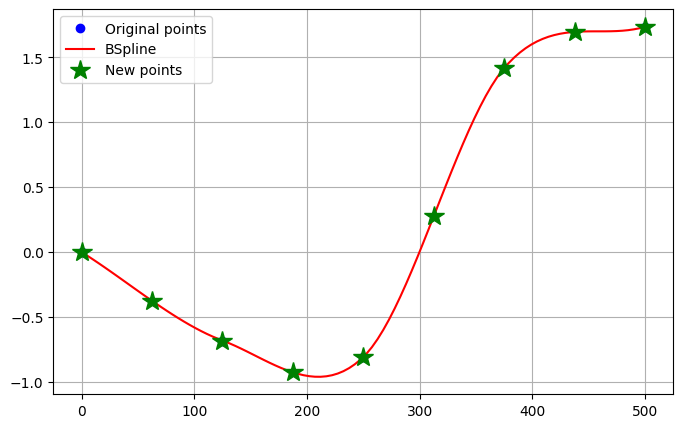

In [52]:
tt = np.linspace(np.min(time),np.max(time), 100)
plt.figure(figsize=(8,5))

plt.plot(time, tx, 'bo', label='Original points')
plt.plot(tt, np.reshape(spline_tx(tt),-1), 'r', label='BSpline')

plt.plot(new_time, new_tx, 'g*', label='New points', markersize = 15)
plt.grid()
plt.legend(loc='best')
plt.show()